# COMP 755

Plan for today

1. More on filters -- sizes, strides, pooling
2. Viewing neural network computation as composition
3. Computing the simplest of gradients for neural networks


$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\ff}{\mathbf{f}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\YY}{\mathbf{Y}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\ddelta}{\boldsymbol{\mathbf{\delta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\EEE}{\mathbf{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\bg}{\mathbf{g}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\hh}{\mathbf{h}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\sss}{\mathbf{s}}
\renewcommand{\rr}{\mathbf{r}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\argmin}{\mathop{\textrm{argmin}}}
\renewcommand{\abs}[1]{\left\lvert#1\right\rvert}
\renewcommand{\sign}{\textrm{sign}}
\renewcommand{\minimize}{\mathop{\textrm{minimize}}}
\renewcommand{\subjectto}{\mathop{\textrm{subject to}}}
$$



# Activation functions

Typical activation functions are

1. Identity $f(x) = x$ 
2. Sigmoid $f(x) = \frac{1}{1 + e^{-x}}$
3. Hyperbolic tangent $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
4. Rectified linear unit (ReLU) $f(x) = \max(x,0) = (x)_{+} = [x>0]x$
![](activations.png)

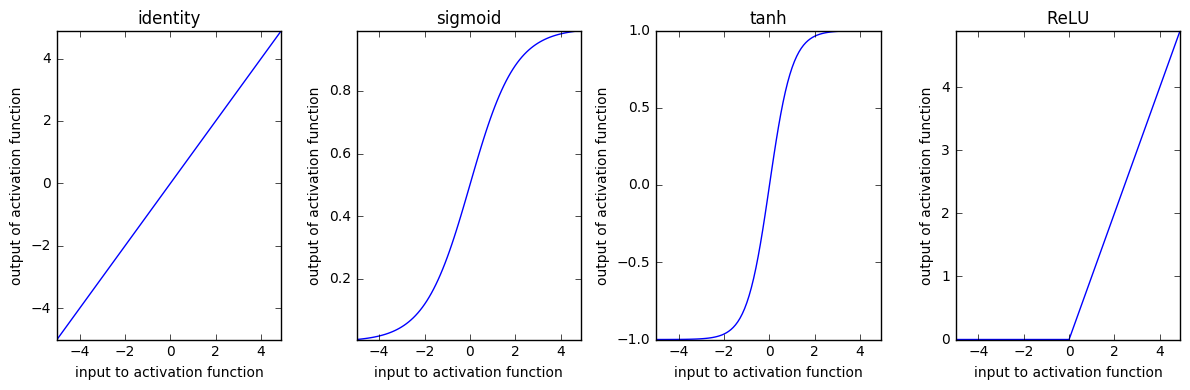

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline
plt.figure(figsize=(12,4))
x = np.arange(-5.0,5.0,0.1)
activations = [('identity',lambda x:x), 
               ('sigmoid' ,lambda x:1./(1. + np.exp(-x))),
               ('tanh'    ,lambda x:(np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))),
               ('ReLU'    ,lambda x: (x>0)*x)]

for (i,act) in enumerate(activations):
    name = act[0]
    f = act[1]
    plt.subplot(1,len(activations),i+1)
    plt.title(name)
    plt.plot(x,f(x))
    plt.xlim([np.min(x),np.max(x)])
    plt.ylim([np.min(f(x)),np.max(f(x))])
    plt.xlabel('input to activation function')
    plt.ylabel('output of activation function')
    
plt.tight_layout()


# Deep networks are composed of layers

Typically the deep networks are built up out of layers.


![](net.png)

# Convolution illustration
![](conv-simple.png)

# Convolutional output size

Suppose we have a matrix of size $5 \times 5$ and we have a filter of size $2 \times 2$. What is the response matrix size?


![](conv-output.png)

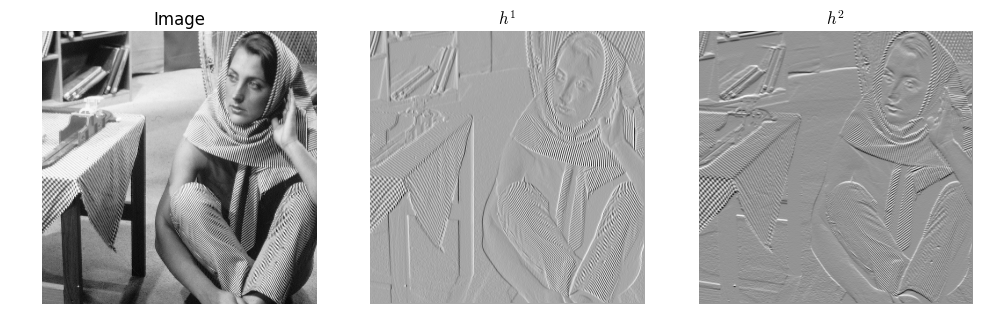

In [22]:
im = misc.imread('barbara.png').astype('float32')
response1 = np.zeros(im.shape)
response2 = np.zeros(im.shape)
for i in range(im.shape[0]-2):
    for j in range(im.shape[1]-2):
        patch = im[i:i+3,j:j+3]                 
        patchvec = patch.reshape(9,1)        
        response1[i,j] = np.dot(filter1vec.T,patchvec)
        response2[i,j] = np.dot(filter2vec.T,patchvec)
        
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(im,cmap='Greys_r')       
plt.title('Image')
plt.axis('off')
plt.subplot(1,3,2)        
plt.imshow(response1,cmap='Greys_r')
plt.axis('off')
plt.title('$h^1$')
plt.subplot(1,3,3)        
plt.imshow(response2,cmap='Greys_r')
plt.axis('off')
plt.title('$h^2$')


# Filters and Convolution

A little bit more formally, discrete (1D) convolution  is computed by
$$
\textrm{conv}(\yy,\xx)_i = \sum_{j} \yy_{i-j}\xx_j
$$


Discrete 2D convolution is computed by
$$
\textrm{conv}(\YY,\XX)_{i,j} = \sum_{k}\sum_l \yy_{i-k,j-l}\xx_{j,k}
$$


Note that the formal definition is a little bit different (indices are decreasing in $\yy$). 


# Convolution can be made fast

Suppose both $\yy$ and $\xx$ are $n$ long
$$
\textrm{conv}(\yy,\xx)_i = \sum_{j} \yy_{i-j}\xx_j.
$$
Naive computation can take $O(N^2)$, since both $i$ and $j$ range from 1 to $N$.

This can be sped up to $O(N \log(N))$ using discrete fourier transform -- details of this are beyond our course, but the idea is to regress both $\yy$ and $\xx$ onto an orthonormal basis in which convolution becomes elementwise addition.

```scipy.signal.convolve2d(y,np.flipud(np.fliplr(x)),mode='valid')```


# Convolutional layers in neural nets

Convolving an image with multiple filters gives responses for each. 

This is typically the first step in deep learning nets.

This example is from 1989! In the illustration 6 filters are applied in the first layer of the network.

![](lenet.png)



# Pooling responses

Here are two images of the same digit but shifted
![](zero.png) ![](zero_shifted.png)


# Other types of layers: Pooling 

In order to make the network's output invariant to small shifts, we can agregate nearby values.

![](pooling.png)

# Other types of layers: Subsampling

![](subsampling.png)

# The concept of stride

You can compute output of a filter for all offsets, or a subset. Stride determines how much you skip.

![](stride.png)

# Formal definition of filter responses in deep nets

Given filter size $d \times d$ and stride $s$ responses $h_{i,j}$ for different filter types are:
* Convolutional $h_{i,j} = \sum_{k=0}^d\sum_{l=0}^{d-1} x_{is+k,js+l} w_{k,l}$
* Max-pool $h_{i,j} = \max_{k,l \in \{0,d-1\}} x_{is+k,js+l}$
* Average-pool $h_{i,j} = \sum_{k=0}^d\sum_{l=0}^{d-1} \frac{1}{d^2} x_{is+k,js+l}$
* Subsample $h_{i,j} = x_{is,js}$

Note that only convolutional filter depends has parameters, rest are fixed.
![](lenet.png)

# How do we train a neural net?

Let's take a bird's eye view of the neural nets.

Given an input $\xx \in \reals^d$, a neural net takes outputs of a layer and feeds them to the next layer.

Let $f$ be the function that computes all outputs of the first layer ($f: \reals^d \rightarrow \reals^{n_1}$)
$$
\hh^1 = f(\xx)
$$

Let $g$ be the functiont ath computes outputs of the second layer using inputs from the first layer ($g: \reals^{n_1} \rightarrow \reals^{n_2}$)
$$
\hh^2 = g(\hh^1)
$$

Hence, second layer's output is given by composition of the two functions
$$
\hh^2 = g(f(\xx)).
$$


# Neural net forward propagation is function composition

Let $f$ be an activation function and 
$$
\ff(\zz)_i = f(z_i)
$$
In words, $\ff$ just applies activation function to each entry in vector $\zz$ and give back a vector of outputs.

This notation will just help us consider the whole layer at once.

Propagation through a single layer $l$
$$
\hh^{l} = \ff(\bb^{l} + \WW^{l}\hh^{l-1})
$$
where $\WW^l$ is matrix of weights, one row per unit, and $\bb$ is a bias matrix.

Hence a two layer network's output is given by
$$
\ff(\bb^{2} + \WW^{2}\ff(\bb^1 + \WW^1 \xx))
$$
and more generally:
$$
\ff(\bb^{l} + \WW^{l}\ff(\bb^{l-1} \WW^{l-1}\ff( ... \ff(\bb^1 + \WW^1 \xx)) ... ))
$$

# Intermission: deep linear neural networks are trivial

Let activation function be identity $f(z) = z$ and $\ff(\zz) = \zz$.

Output of the first layer is
$$
\ff(\bb^1 + \WW^1\xx) = \bb^1 + \WW^1\xx
$$

Output of the second layer is 

\begin{align}
\ff(\bb^2 + \WW^2\ff(\bb^1 + \WW^1\xx)) &= \bb^2  + \WW^2(\bb^1 + \WW^1\xx) \\
&=\underbrace{\bb^2 + \WW^2\bb^1}_{\bb} + \underbrace{\WW^2\WW^1}_{\WW}\xx
\end{align}

is equivalent to output of a single layer network with bias $\bb$ and weights $\WW$.

Hence two layer linear network "collapses" into a single layer linear neural network.

# Intermission: deep linear neural networks are trivial

Conclusion: Networks using **solely** identity activations are trivial. 

However, some of the recent results in deep learning argue for a sum of linear and nonlinear activations
$$
f(z) = z + g(z)
$$
giving rise to **residual networks** -- residual because they model residual, $z - f(z)$

# Multivariate calculus refresher -- total derivative


Total derivative
$$
f(\zz(t)) = \sum_i \frac{\partial f}{\partial z_i}\frac{\partial z_i}{\partial t} 
$$


Let's say 
$$
f(x,y,z) = x^2 + y^2 + z^2
$$
and let's say
$$
g(t) = f(t,t,1)
$$
**Q:** Using formula for total derivative 
$$
\frac{\partial g(t)}{\partial t} = \frac{\partial f}{\partial{x}}\frac{\partial x}{\partial{t}} + \frac{\partial f}{\partial{y}}\frac{\partial y}{\partial{t}} + \frac{\partial f}{\partial{z}}\frac{\partial z}{\partial{t}}
$$ compute $\frac{\partial g(t)}{\partial t}$.




# Objectives for fitting the neural networks

Typical applications of neural networks are in supervised learning (data $\{y^t,\xx^t:t=1,...,N\}$)

The output of the network
$$
\hat{y}(\xx) = f(\bb^{l} + \WW^{l}\ff(\bb^{l-1} \WW^{l-1}\ff( ... \ff(\bb^1 + \WW^1 \xx)) ... ))
$$

In order to asses how the network is performing we need an objective.
$$
E = \sum_t \textrm{loss}(\hat{y}(\xx^t),y^t)
$$

Typical losses
* square loss $(\hat{y}(\xx^t) - y^t)^2$
* cross-entropy loss  $-y^t\log(\hat{y}(\xx^t)) + (1 - y^t)(1 - \hat{y}(\xx^t))$

We note that objectives, $E$, depend on $\hat{y}(\xx^t)$, which in turn depends on parameters $\bb$ and $\WW$.

# Toy network

For simplicity we will first look at a toy network with two layers
$$
\hat{y}(\xx) = f(\bb^{2} + \WW^{2}\ff(\bb^1 + \WW^1 \xx))
$$
and some objective $E$

Our goal is to solve the optimization problem
$$
\minimize_{\bb^1,\bb^2,\WW^2,\WW^2} \sum_t \textrm{loss}(\hat{y}(\xx^t),y^t)
$$
and we will use gradient descent for this. Hence, we need $\frac{\partial E}{\bb^l}$ and $\frac{\partial E}{\WW^l}$

This seems tricky.

# Looking at the objective and forward propagation

In our simple toy network the objective is a sum of compositions of loss, second layer function, and first layer function.

$$
E = \sum_t \textrm{loss}(\hat{y}(\xx^t),y^t)
$$
where
$$
\hat{y}(\xx) = f(\bb^{2} + \WW^{2}\ff(\bb^1 + \WW^1 \xx))
$$

Let's say we wanted to compute derivative with respect to a second layer weight $\frac{\partial E}{\partial w^2_{ij}}$.

We can use chain rule:
$$
\frac{\partial E}{\partial w^2_{ij}} = \frac{\partial E}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w^2_{ij}} 
$$
but this is still a bit tricky -- that second partial derivative is complicated.



# Looking at the objective and forward propagation
Given 
$$
\hat{y}(\xx) = f(\bb^{2} + \WW^{2}\ff(\bb^1 + \WW^1 \xx))
$$
we got to
$$
\frac{\partial E}{\partial w^2_{ij}} = \frac{\partial E}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w^2_{ij}} 
$$

However that second derivative still looks tricky. Recall that even though this is composition we can take advantage of the intermediate computation in layers.


\begin{align}
\hat{y}(\xx) &= f(\zz^2)\\
\zz^2 &= \bb^2 + \WW^2\hh^2 \\
\hh^2 &= \ff(\zz^1) \\
\zz^1 &= \bb^1 + \WW^1\xx 
\end{align}


and

$$
\frac{\partial E}{\partial w^2_{ij}} = \frac{\partial E}{\partial \hat{y}}\sum_k\frac{\partial \hat{y}}{\partial{z^2_k}}\frac{\partial z^2_k}{\partial w^2_{ij}} = \frac{\partial E}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial{z^2_i}}h^2_j
$$

Q: Why does the sum 
$$
\sum_k\frac{\partial \hat{y}}{\partial{z^2_k}}\frac{\partial z^2_k}{\partial w^2_{ij}} 
$$ disappear and only term $\frac{\partial \hat{y}}{\partial{z^2_i}}h^2_j$ is left?






# Looking at the objective and forward propagation

$$
\frac{\partial E}{\partial w^2_{ij}} = \frac{\partial E}{\partial \hat{y}}\sum_k\frac{\partial \hat{y}}{\partial{z^2_k}}\frac{\partial z^2_k}{\partial w^2_{ij}} = \frac{\partial E}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial{z^2_i}}h^2_j
$$

In order to compute this derivative we need
* derivative of loss  $\frac{\partial E}{\partial \hat{y}}$
    * for sum of squares $2(\hat{y} - y)$
    * for cross entropy $-y\frac{1}{\hat{y}} - (1-y)\frac{1}{1 - \hat{y}}$
* derivative of activation $\frac{\partial \hat{y}}{\partial{z^2_i}} = \frac{\partial f(\zz^2)}{\partial z^2_i}$ 
    * for ReLU $[z^2_i > 0]$
    * for sigmoid $f(z^2_i)f(1-z^2_i)$
* $h^2_j$

# Recap

We computed the simplest of the derivatives. It depended on 
1. contribution from the loss
2. contribution from the activation function
3. state of the input nodes

Next time we will generalize this for the first layer and the deeper networks.

